In [67]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

from moepy import lowess, eda

bounds = np.load("../proprietary/edh_boundaries.npy")
transients = np.load("../proprietary/transients_interp.npy")

tr1 = np.array_split(transients[0, :], 31)
for i, arr in enumerate(tr1):
    tr1[i] = np.mean(arr)
tr1 = np.array(tr1)
bd1 = np.array(range(0, np.max(bounds[0, :]), np.max(bounds[0, :]) // 31))[1:]
tr1.shape, bd1.shape

((31,), (31,))

In [69]:
# Remove ambient light
filters = []
for val in tr1:
    if val == stats.mode(tr1):
        filters.append(False)
    else:
        filters.append(True)
tr1 = tr1[filters]
bd1 = bd1[filters]

array([[3.94401356e-13, 2.08318852e-08],
       [1.49889823e-12, 8.38273822e-08],
       [2.97206457e-12, 1.75449888e-07],
       [3.84547596e-13, 2.38957876e-08],
       [8.57551965e-13, 5.59526931e-08],
       [8.42526780e-13, 5.75900755e-08],
       [6.33838102e-13, 4.52947046e-08],
       [5.82689358e-13, 4.34499800e-08],
       [5.25249257e-13, 4.07987360e-08],
       [3.87204113e-13, 3.12791227e-08],
       [3.21173825e-13, 2.69429510e-08],
       [2.83918488e-13, 2.46997728e-08],
       [2.48914883e-13, 2.24279777e-08],
       [2.19202105e-13, 2.04318282e-08],
       [1.92435814e-13, 1.85348403e-08]])

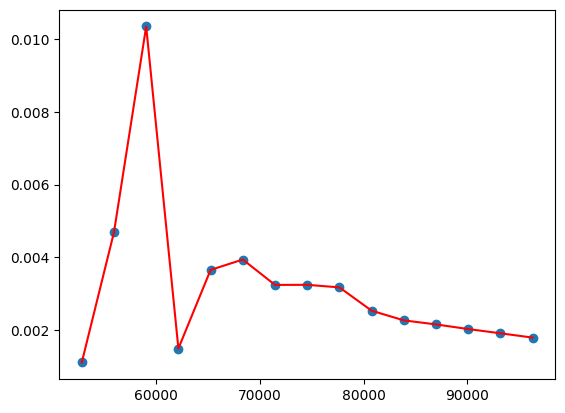

In [70]:
lowess_model = lowess.Lowess()
lowess_model.fit(bd1, tr1, frac=0.1)
pred_lowess_vals = lowess_model.predict(bd1)
plt.scatter(bd1, tr1)
plt.plot(bd1, pred_lowess_vals, 'r')
lowess_model.design_matrix